In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
#since we don't have a missing value we don't need to handle it using dropna or imputation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Feature Scaling

In [ ]:
#splitting datetime to 2 features date and time
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4


In [ ]:
#splitting date to day, month, year
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011


In [ ]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,am_or_pm
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011,0
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011,0
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011,0


In [ ]:
#check for holidays
from datetime import date
import holidays
def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0
df['holidays'] = df['date'].apply(is_holiday)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,am_or_pm,holidays
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2011,0,1,1,2011,0,0
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2011,1,1,1,2011,0,0
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2011,2,1,1,2011,0,0
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2011,3,1,1,2011,0,0
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2011,4,1,1,2011,0,0


In [ ]:
# now we'll drop datetime and date
df.drop(['datetime', 'date'], axis=1,inplace=True)

<ipython-input-14-7143ff1063eb>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


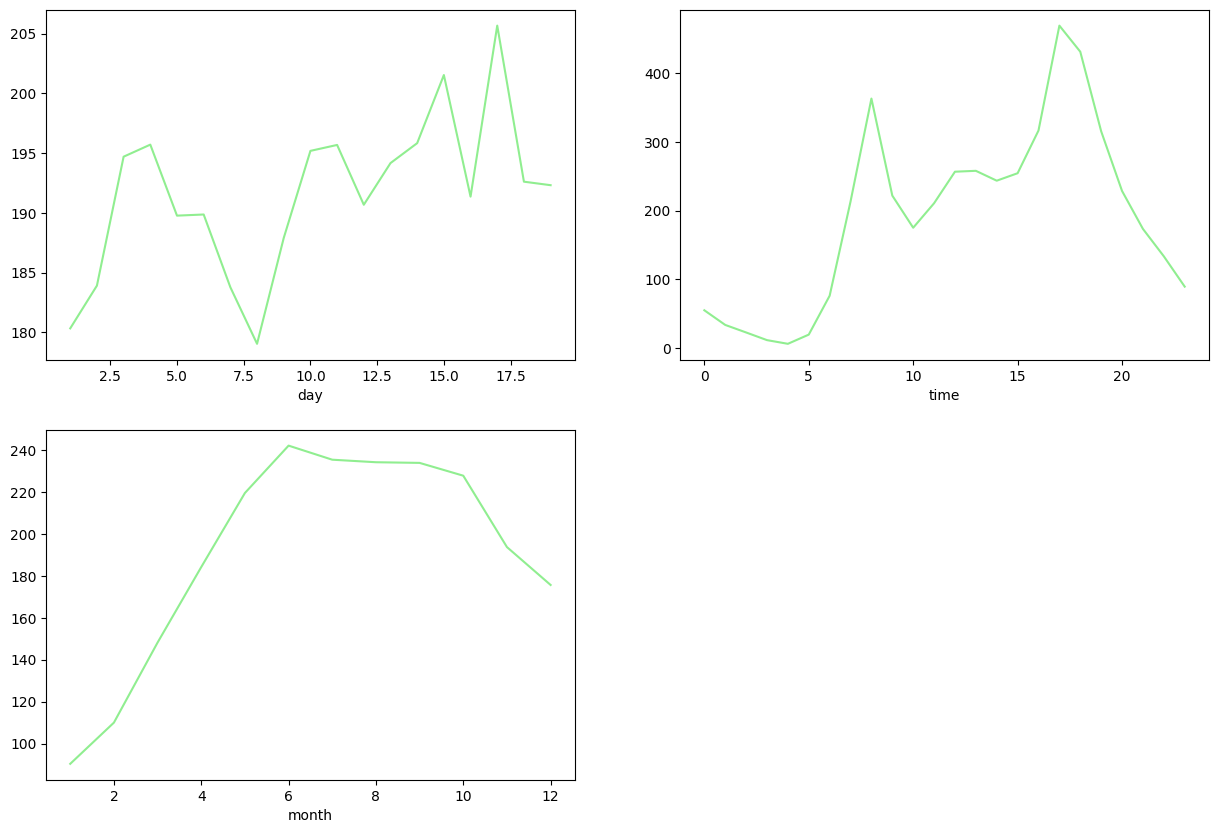

In [ ]:
#relation of count with day, time and month by making a 2x2 grid
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot(color = 'lightgreen')
plt.show()

<ipython-input-15-2e9a2713374b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)


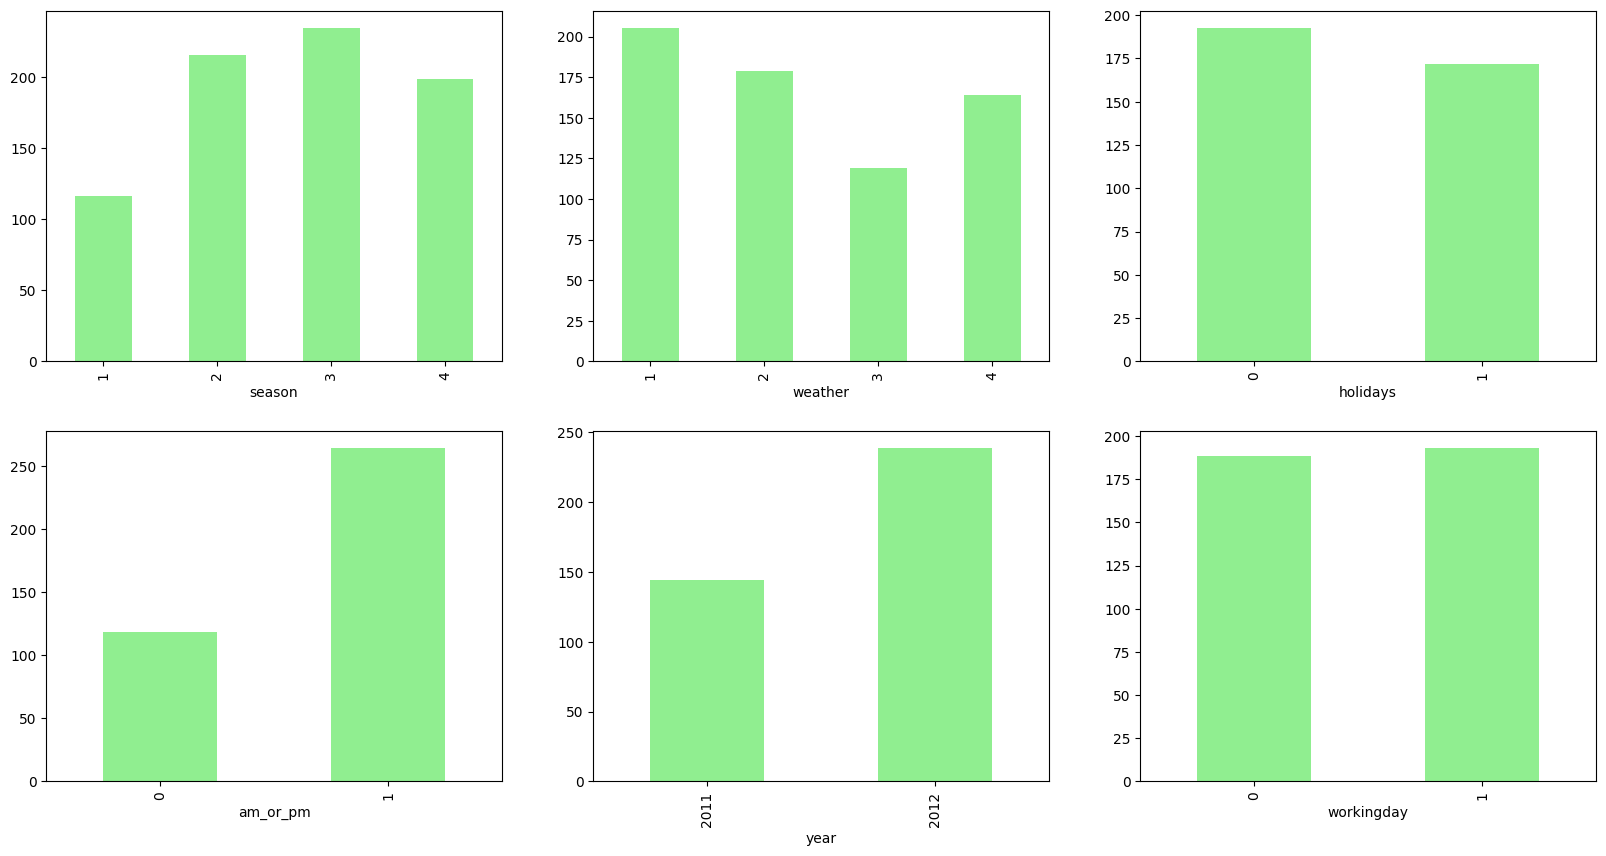

In [ ]:
features = ['season', 'weather', 'holidays','am_or_pm', 'year', 'workingday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar(color = 'lightgreen')
plt.show()

<ipython-input-16-9c3662a0df88>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)
<ipython-input-16-9c3662a0df88>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],color = 'lightgreen')
<ipython-input-16-9c3662a0df88>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating

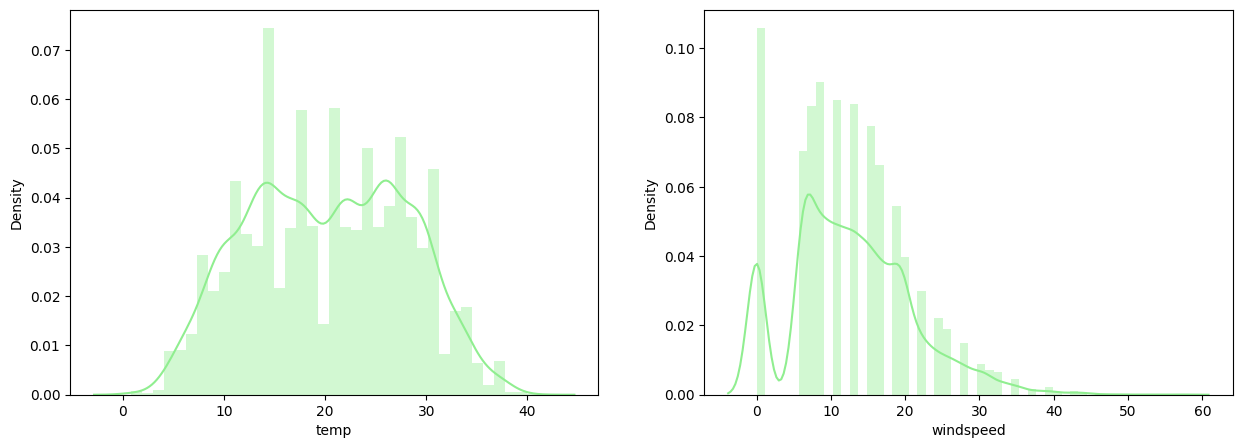

In [ ]:
import seaborn as sb
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col],color = 'lightgreen')
plt.show()

<ipython-input-17-c1046da307ae>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


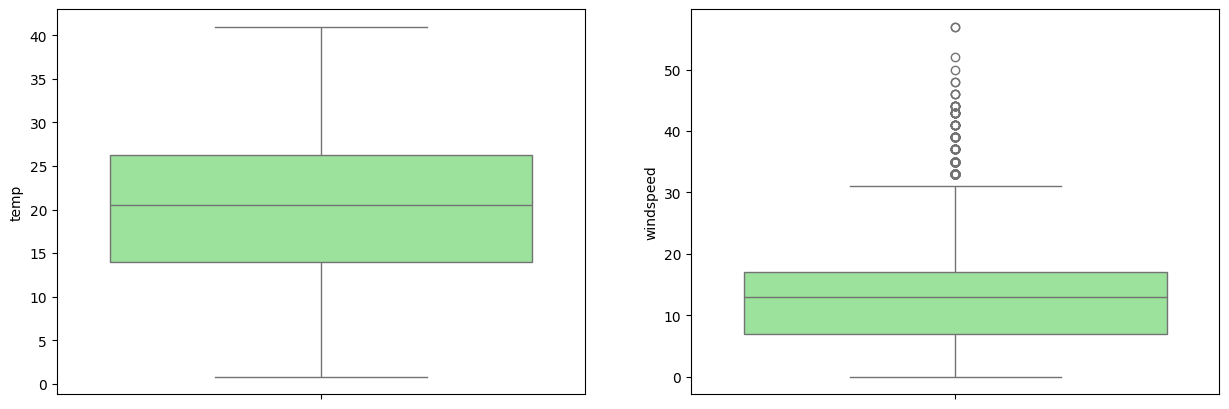

In [ ]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col],color = 'lightgreen')
plt.show()

In [ ]:
rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to', rows)

Number of rows that will be lost if we remove outliers is equal to 227


<ipython-input-19-c8dc83f7640f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


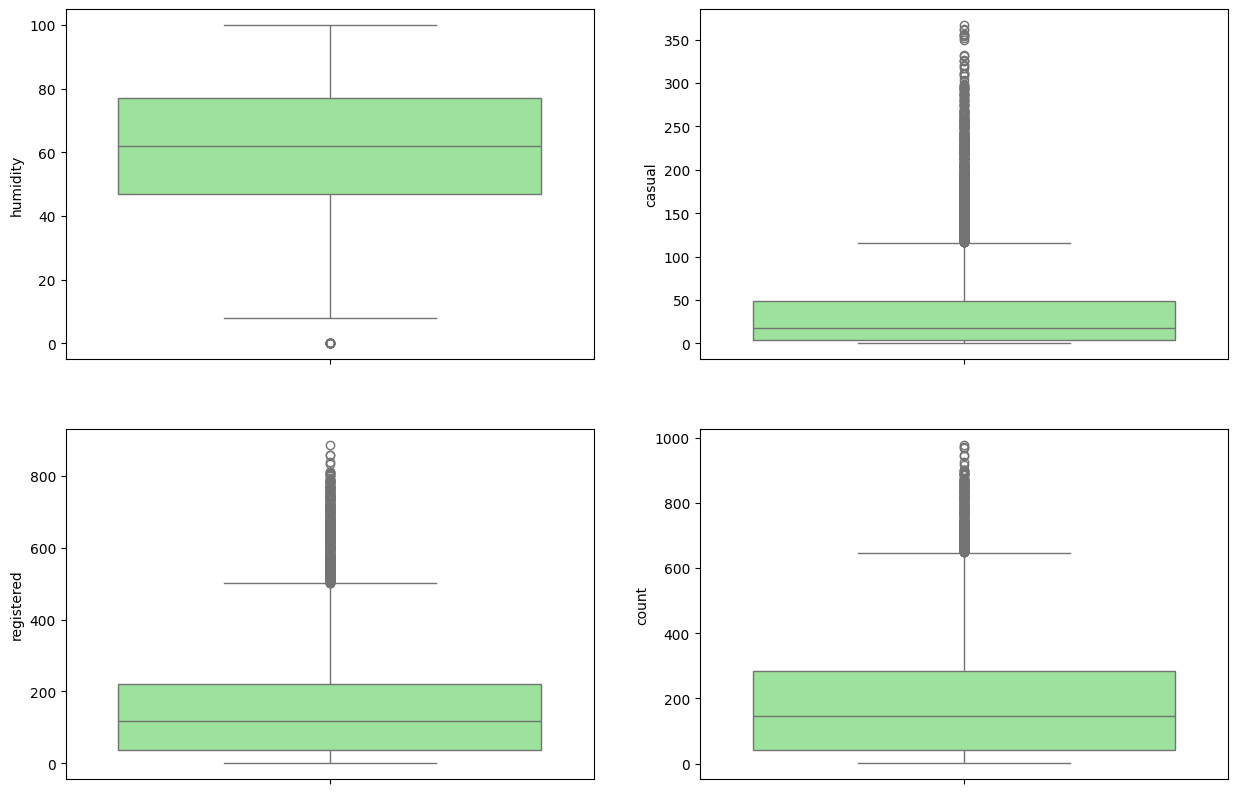

In [ ]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col],color = 'lightgreen')
plt.show()

In [ ]:
rows = df.shape[0] - df[df['humidity'] > 0].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to', rows)

Number of rows that will be lost if we remove outliers is equal to 22


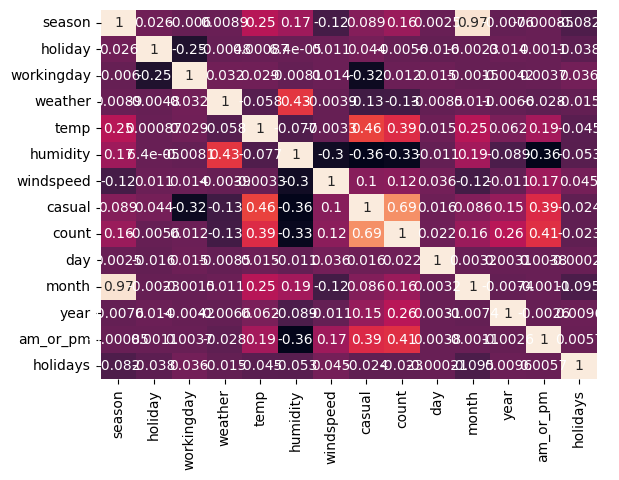

In [ ]:
# check for highly correlated data

sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
#registered is highly correlated to count and time
df.drop(['registered', 'time','atemp'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
input = df.drop(['count'], axis=1)
target = df['count']

x_train, x_test, y_train,y_test=train_test_split(input, target,test_size=0.1,random_state=22) #9800 samples for training and 1086 samples for testing
print(x_train.shape, x_test.shape)


(9574, 13) (1064, 13)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
xtrain_sc = sc.fit_transform(x_train)
xtest_sc = sc.fit_transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(4):
    models[i].fit(xtrain_sc, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict(xtrain_sc)
    print('Training Error : ', mae(y_train, train_preds))

    val_preds = models[i].predict(xtest_sc)
    print('Validation Error : ', mae(y_test, val_preds))
    print()

LinearRegression() : 
Training Error :  81.96359289956585
Validation Error :  81.5074361138022

Lasso() : 
Training Error :  81.6046495846068
Validation Error :  81.23795924204568

RandomForestRegressor() : 
Training Error :  22.337469776550304
Validation Error :  60.309631601324746

Ridge() : 
Training Error :  81.96164104241315
Validation Error :  81.50606098642315



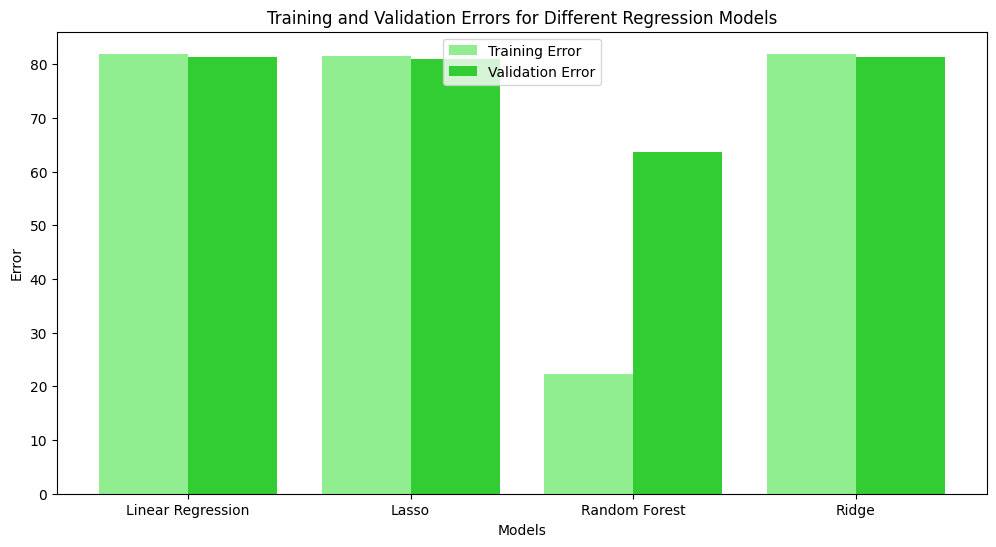

In [ ]:
models = ['Linear Regression', 'Lasso', 'Random Forest', 'Ridge']
training_errors = [81.98, 81.62, 22.25, 81.98]
validation_errors = [81.28, 80.94, 63.59, 81.28]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, training_errors, width=0.4, label='Training Error',color = 'lightgreen')
plt.bar([i + 0.4 for i in x], validation_errors, width=0.4, label='Validation Error',color = 'limegreen')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Training and Validation Errors for Different Regression Models')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()
plt.show()

In [ ]:
# we get the best results from RandomForestRegressor